In [834]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dataset-for-bta-419-2023/BTA_419_2023_Data.csv


# **Portuguese Banking Term Deposit Subscription Prediction**

# **Describe the dataset**
This dataset contains information collected by a Portuguese banking institution for a marketing campaign, it was collected as a result of their telemarketing system. The goal of this dataset was to identify how successful the campaign was in achieving long-term bank deposits, and several different variables of their clients including socioeconomic and  telemarketing related variables. The (21) variables are as follows:

1. age
2. job (type of job)
3. marital 
4. education
5. default (has credit in default)
6. housing (has housing loan)
7. loan (has personal loan)
8. contact (how to contact)
9. month (last contact month)
10. day_of_week (last contact day of week)
11. duration (last contact duration in seconds)
12. campaign (number of contacts for this client and for this campaign)
13. pdays (number of days passed since the client was last contacted)
14. previous (number of contacts for this client before this campaign)
15. poutcome (outcome of previous campaign)
16. emp.var.rate (employment variation rate - quarterly)
17. cons.price.idx (consumer price index - monthly)
18. cons.conf.idx (consumer confidence index - monthly)
19. euribor3m (euribor 3 month rate - quarterly)
20. nr.employed (number of employees - quarterly)
21. has the client subscribed to a term deposit? (outcome variable)

# **Loading Data into the Notebook**

In [835]:
bank_data = pd.read_csv("/kaggle/input/dataset-for-bta-419-2023/BTA_419_2023_Data.csv")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [836]:
bank_data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


# **Looking at Dataset Information**

In [837]:
#Displaying total rows and columns of dataset (shape)
bank_data.shape

(41188, 21)

In [838]:
#Displaying general dataset information, such as their datatypes and variables
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [839]:
#Finding any null values
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [840]:
#Describing the data (numerical only)
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [841]:
#Unique categorical variables
print('Job:\n',bank_data['job'].unique())
print('Marital:\n',bank_data['marital'].unique())
print('Education:\n',bank_data['education'].unique())
print('Default:\n',bank_data['default'].unique())
print('Housing:\n',bank_data['housing'].unique())
print('Loan:\n',bank_data['loan'].unique())
print('Contact:\n',bank_data['contact'].unique())
print('Month:\n',bank_data['month'].unique())
print('Day:\n',bank_data['day_of_week'].unique())
print('Poutcome:\n',bank_data['poutcome'].unique())
print('Subscribed:\n',bank_data['y'].unique())

Job:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']
Contact:
 ['telephone' 'cellular']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Day:
 ['mon' 'tue' 'wed' 'thu' 'fri']
Poutcome:
 ['nonexistent' 'failure' 'success']
Subscribed:
 ['no' 'yes']


In [842]:
#Grouping together the "basic" education variables (4y/6y/9y)
bank_data['education']=np.where(bank_data['education'] =='basic.9y', 'basic', bank_data['education'])
bank_data['education']=np.where(bank_data['education'] =='basic.6y', 'basic', bank_data['education'])
bank_data['education']=np.where(bank_data['education'] =='basic.4y', 'basic', bank_data['education'])

print('Education:\n',bank_data['education'].unique())

Education:
 ['basic' 'high.school' 'professional.course' 'unknown' 'university.degree'
 'illiterate']


# **Identifying Value Counts of Term Deposit Subscription**

In [843]:
#Outcome variable (subscribed (y) vs. didn't subscribe (n))
bank_data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [844]:
#Checking and dropping duplicate information
bank_data.duplicated().sum()
bank_data = bank_data.drop_duplicates()

#Showing the value count of outcome variable after dropping duplicates
bank_data.default.value_counts()

no         32574
unknown     8596
yes            3
Name: default, dtype: int64

In [845]:
#Value counts of jobs
bank_data.job.value_counts()

admin.           10419
blue-collar       9250
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [846]:
#Value counts of loan variable
bank_data.loan.value_counts()

no         33936
yes         6247
unknown      990
Name: loan, dtype: int64

In [847]:
bank_data.drop(bank_data[bank_data['loan']=="unknown"].index, inplace=True)

**Term Deposit Subscription Percentage (Yes vs. No)**

In [848]:
no_td,yes_td = bank_data['y'].value_counts()
print(f"No Term Deposit\t = {round(no_td/bank_data.shape[0],3)*100}%")
print(f"Yes Term Deposit\t = {round(yes_td/bank_data.shape[0],3)*100}%")

No Term Deposit	 = 88.7%
Yes Term Deposit	 = 11.3%


**Term Deposit Subscriptions Plot of Total (Yes vs. No)**

yes    4532
Name: y, dtype: int64
no    35651
Name: y, dtype: int64


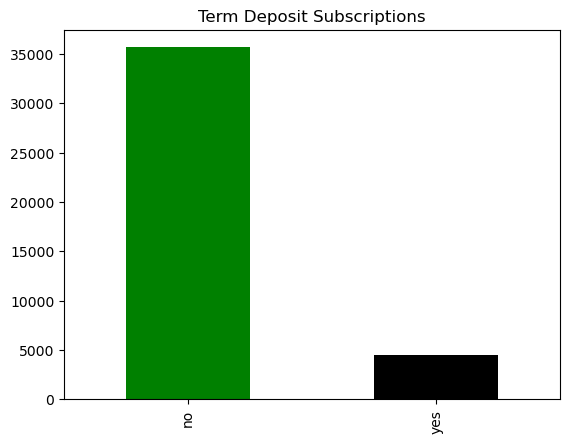

In [849]:
#Creating a bar graph of Term Deposit Subscriptions
subscription = bank_data['y'].value_counts()
subscription.plot(kind = 'bar', color = ['green', 'black'])

#Plotting
plt.title("Term Deposit Subscriptions")

#Count of yes vs. no
print(bank_data['y'][bank_data.y == 'yes'].value_counts())
print(bank_data['y'][bank_data.y == 'no'].value_counts())

The above barchart visualizes the percentage difference of the term deposits. It is shown that a majority of people that are reached and asked if they want to subscribe to the term deposit, will say no.

**Total Yes Responses:** 11.26% (4,640)
**Total No Responses:** 88.73% (36,548)

# **Business Question/Problem Statement**

The Portuguese Banking Instituition wants to identify their success rate, and problem at hand is how to identify where it would be best for them to focus their telemarking in order to achieve higher rates of success. These can be achieved by potentially focusing on certain characteristics of customers that can be identified by certain variables or correlating variables. Of the existing collected infomation, which demographics are correlated to subscribing to the bank term deposits?


# **Defining the outcome variable (how is it linked to business question and problem statement)**

The outcome variable of this dataset is the 'y' column which records whether or not a customer subscribed to a bank term deposit or not (yes or no). The goal of this analysis is to identify which variables/demographics are more likely to subscribe to the bank term deposits in order to achieve the increased success rate for the Portuguese Banking Instituition.


# **Visualizing the Variables of the Dataset**

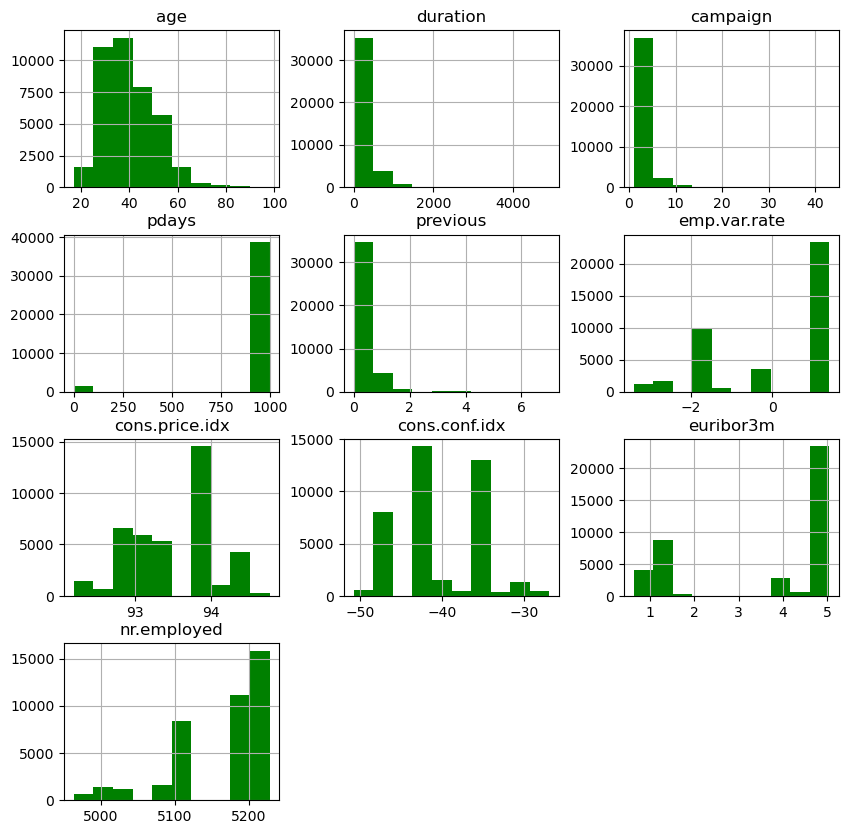

In [850]:
#Plotting histograms of each numeric variable
bank_data.hist(figsize =(10,10), color = "green")
plt.show()

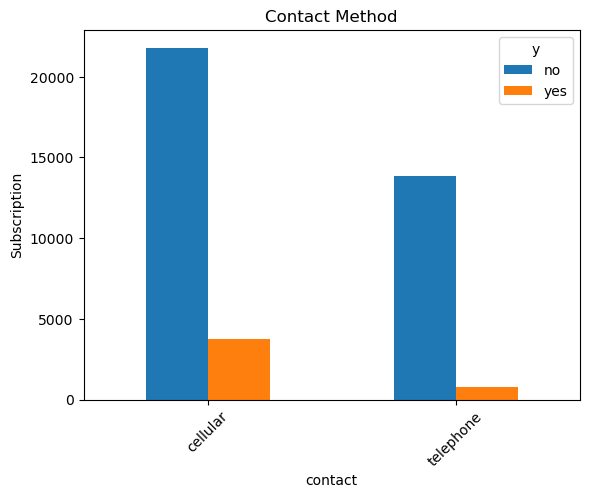

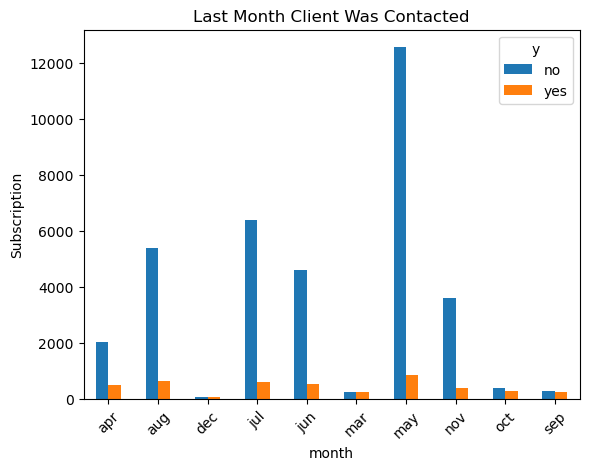

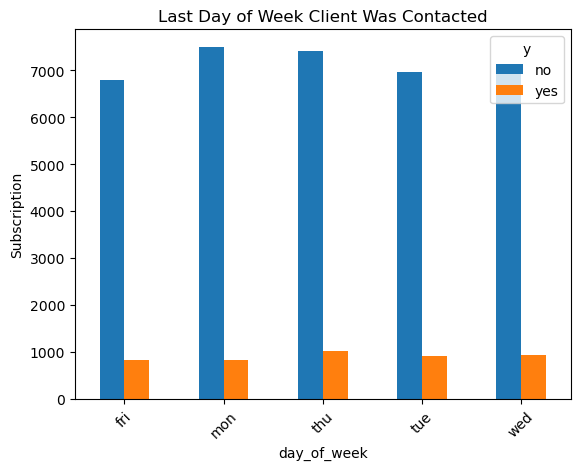

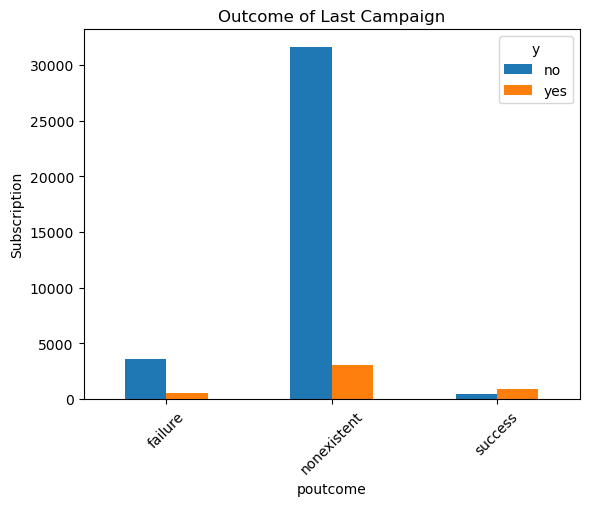

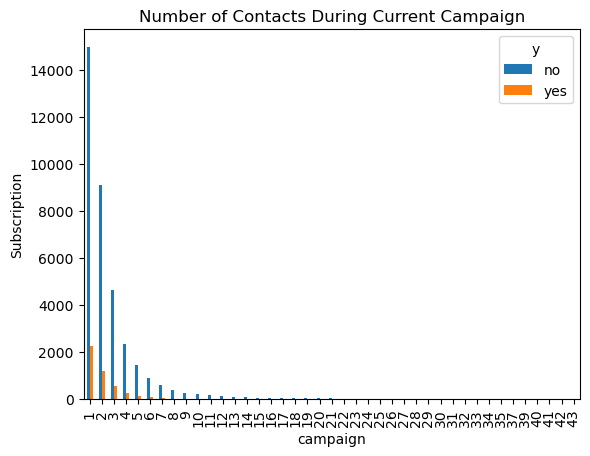

In [851]:
#Plotting categorical data using bar charts 
pd.crosstab(bank_data.contact,bank_data.y).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Subscription')
plt.title("Contact Method")
plt.show()

pd.crosstab(bank_data.month,bank_data.y).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Subscription')
plt.title("Last Month Client Was Contacted")
plt.show()

pd.crosstab(bank_data.day_of_week,bank_data.y).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Subscription')
plt.title("Last Day of Week Client Was Contacted")
plt.show()

pd.crosstab(bank_data.poutcome,bank_data.y).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Subscription')
plt.title("Outcome of Last Campaign")
plt.show()

pd.crosstab(bank_data.campaign,bank_data.y).plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Subscription')
plt.title("Number of Contacts During Current Campaign")
plt.show()

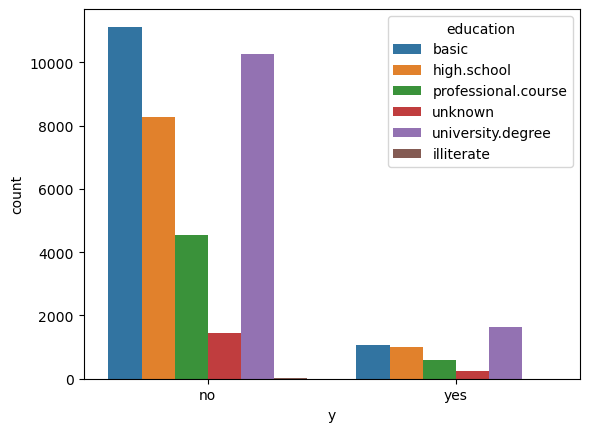

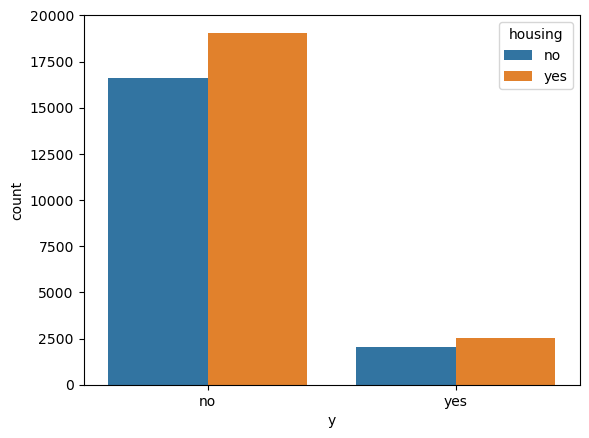

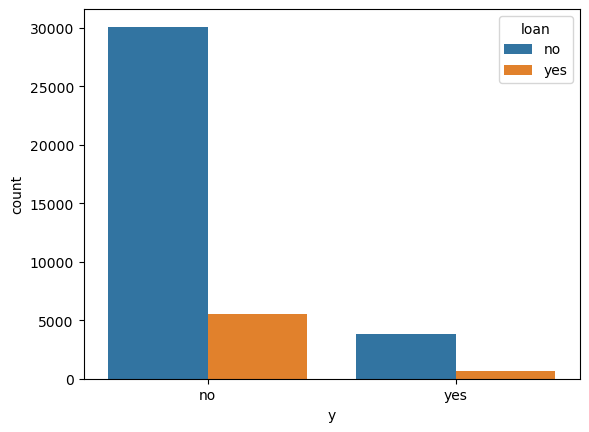

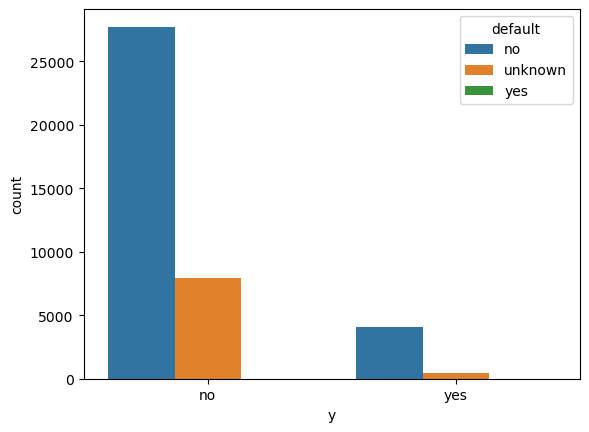

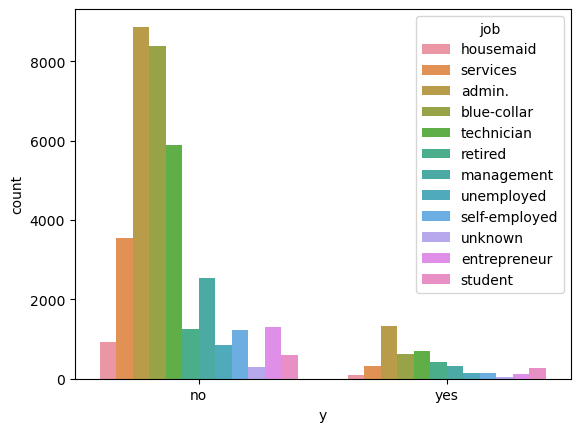

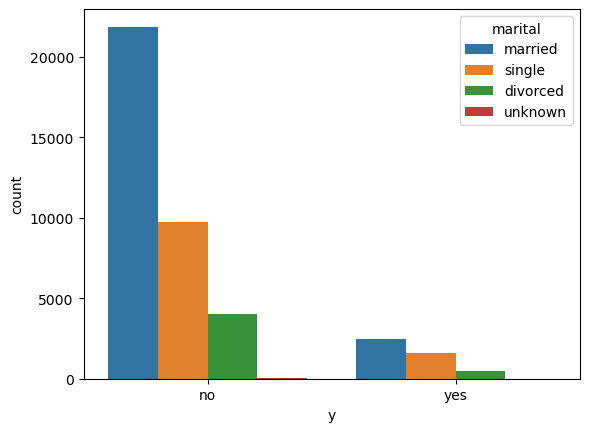

In [852]:
#Plotting categorical data (continued)
sns.countplot(x = 'y',hue = 'education',data = bank_data)
plt.show()

sns.countplot(x = 'y',hue = 'housing',data = bank_data)
plt.show()

sns.countplot(x = 'y',hue = 'loan',data = bank_data)
plt.show()

sns.countplot(x = 'y',hue = 'default',data = bank_data)
plt.show()

sns.countplot(x = 'y',hue = 'job',data = bank_data)
plt.show()

sns.countplot(x = 'y',hue = 'marital',data = bank_data)
plt.show()

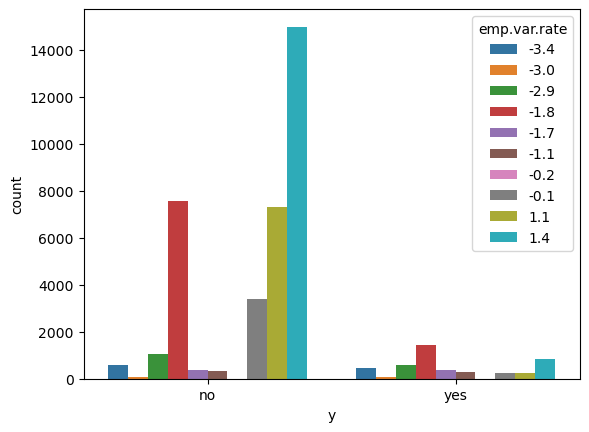

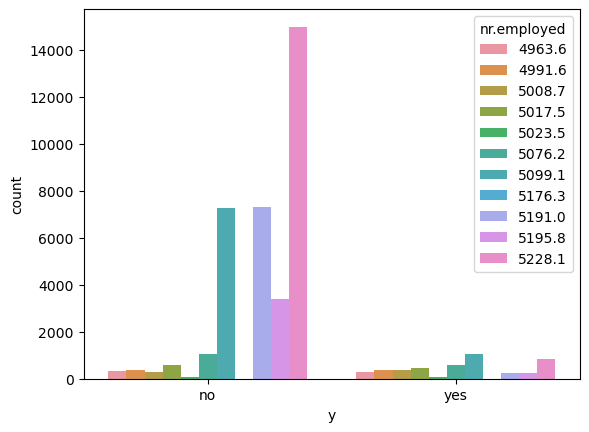

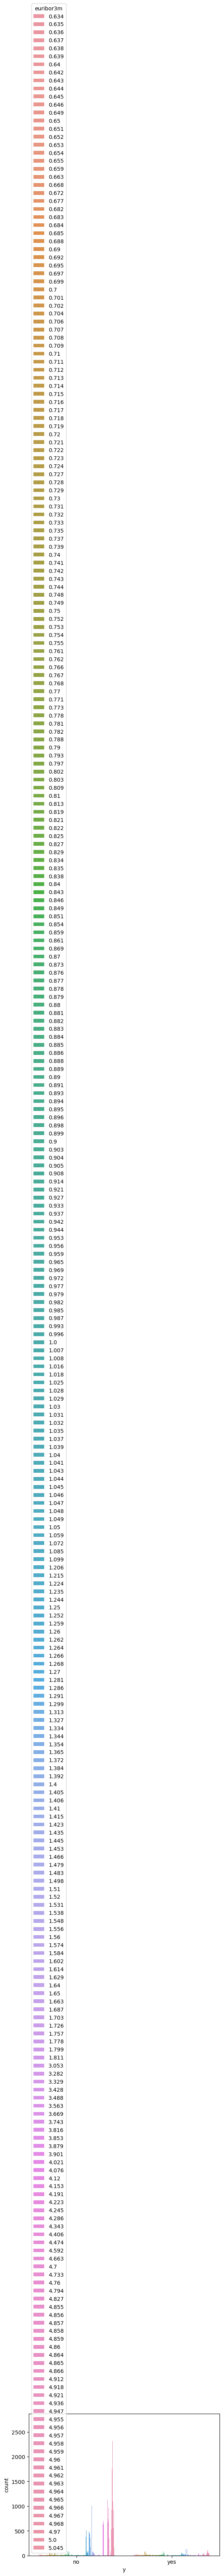

In [853]:
#Plotting categorical data (continued)
sns.countplot(x = 'y',hue = 'emp.var.rate',data = bank_data)
plt.show()

sns.countplot(x = 'y',hue = 'nr.employed',data = bank_data)
plt.show()

sns.countplot(x = 'y',hue = 'euribor3m',data = bank_data)
plt.show()

# **Observations of above plotted data**
* Most of the suscribers were contacted on the cellphone
* Most subscribers are married and between the ages of 20-40
* Most subscribers hold a university degree
* Most subscribers subscribed within 5 compaign contacts

# **Dropping dummy data**

In [854]:
cat_dummy = ['job','education','marital']
dummies = pd.get_dummies(bank_data, prefix = cat_dummy, columns = cat_dummy)
print(bank_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [855]:
bank_data = dummies.drop(columns=dummies.columns[:1], axis=1)
print(bank_data.columns)

Index(['default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_basic', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown'],
      dtype='object')


# **Logistic Regression**

In [856]:
#Converting ALL categorical data to numerics using factorization
cat_columns = bank_data.select_dtypes(['object','category','float64']).columns
bank_data[cat_columns]=bank_data[cat_columns].apply(lambda x: pd.factorize(x)[0])

<AxesSubplot:>

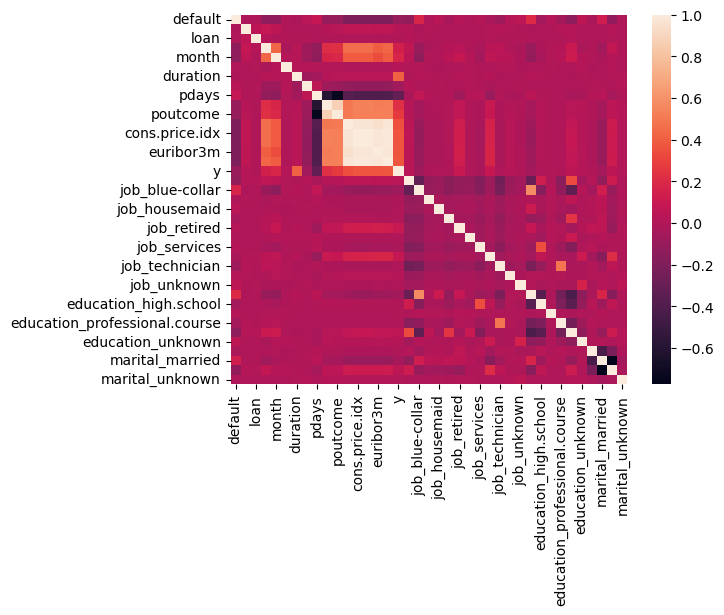

In [857]:
#Finding correlation between the variables of the data frame
sns.heatmap(bank_data.corr())

With the above heatmap, we can see that the ligher shades of color show correlation, and the darker shades of color show low correlation. The white is ignored as it represents the same variable on the x and y axis. With this heatmap, emp.var.rate, nr.employed, and euribor3m are all variables with high correlation.

# **Prediction Model for Outcome Variable**

As shown with the above heatmap, the variables with high correlation include: emp.var.rate, nr.employed, and euribor3m. Given this outcome, these three variables will be used for the prediction model and to identify if these variables better predict whether a client subscribs to a term deposit or not.

Potential reasonings for high correlation of these variables:
* emp.var.rate: The change of employment and economic status can potentially change the likelihood of a client subscribing to a bank term deposit (people are generally less likely to spend money during a recession or during difficult economic times).
* nr. employed: The higher number of employees that the bank employ could lead to better reach, better customer service, and therefore - better success rates for subscription.
* euribor3m: The interest rates for lending can affect when clients are more likely to subscribe to a bank term deposit.

In [858]:
#Selecting Feature Columns
#Splitting the dataset in features and target variable

feature_cols = ['euribor3m','emp.var.rate','nr.employed']
X = bank_data[feature_cols] #Feature columns
Y = bank_data.y #Target variable

#Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)



In [859]:
#Model Development and Prediction

#Instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=1)

#Fit the model with data
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

print('Accuracy of Logisitic Regression: {:.2f}'.format(logreg.score(X_test,Y_test)))

Accuracy of Logisitic Regression: 0.89


In [860]:
#Model Evaluation using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(Y_test,Y_pred)
cnf_matrix

array([[10410,   262],
       [ 1096,   287]])

Text(0.5, 427.9555555555555, 'Predicted label')

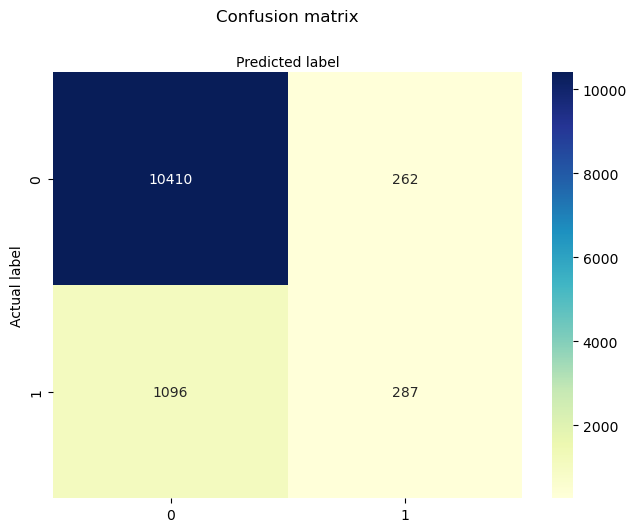

In [861]:
#Visualizing Confusion Matrix using Heatmap

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [862]:
#Confusion Matrix Evaluation Metrics
target_names=['Yes Term Deposit Subscription', 'No Term Deposit Subscription']
print(classification_report(Y_test, Y_pred, target_names=target_names))


                               precision    recall  f1-score   support

Yes Term Deposit Subscription       0.90      0.98      0.94     10672
 No Term Deposit Subscription       0.52      0.21      0.30      1383

                     accuracy                           0.89     12055
                    macro avg       0.71      0.59      0.62     12055
                 weighted avg       0.86      0.89      0.87     12055



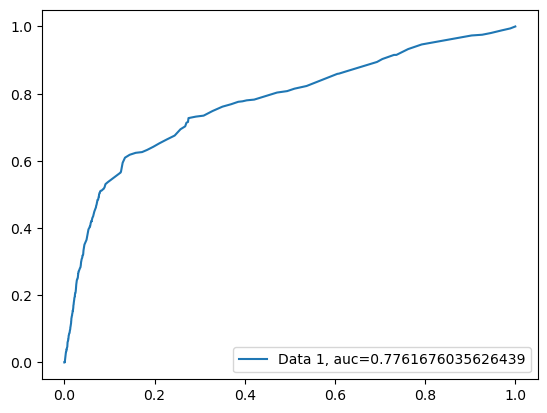

In [863]:
#ROC Curve
Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="Data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Description of above results**

As shown above, the logisitic regression provides a result of 89% accuracy, and for the ROC score, the AUC of 0.77 is good (with 1 being a perfect classifier and 0.5 being the worst classifier)

# **Executive Summary**


**Overview**

The collected information represents a telemarketing campaign from a Portuguese Banking Institution, the dataset holds variables of clients ranging from their socioeconomic information to different variables regarding the telemarketing campaign itself. The goal of analysis for this dataset was to idenfiy if certain demographic variables correlate to higher rates of success for bank term deposit subscription.

**Business Question and Problem Statement**

The banking instituion would have higher success rates of subscription to the bank term deposits if they knew how to better market to their clients. This analysis was conducted to find which demographics may correlate to higher success rates for the subscription.

**Analysis Conducted**

The data was explored to identify the amount of variables, kinds of datatypes, if there were any null or duplicates within the dataset, and general plotting of variables to find if any in particular showed higher subcription rates. Upon looking at the visualized variables, a heatmap was created to identify correlating variables for better prediction. The heatmap revealed that the variables: emp.var.rate, nr.employed, and euribor3m had higher correlation than the other variables. These variables showed the highest in terms of predictability for identifying if a client will subcribe to a bank term deposit, so a logistic regression model was created to check the accuracy of the prediction. It was concluded that the accuracy rate was 89%, which is very good.

**Solution**

Upon analysis, it is recommended that the Portuguese banking institution should consider using the variables of: emp.var.rate, nr.employed, and euribor3m to have higher success rates for their telemarketing campaigns. These variables can be related to conducting a telemarketing campaign when the interest rates are higher (euribor3m), when the economy is stable (emp.var.rate), and when they have higher numbers of staff to conduct the campaign (nr.employed). Given this analysis, these variables conditions are optimal for when clients are more likely to subscribe, and this model can predict whether a client subscribes 89% of the time.